In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)


In [3]:
trader_df = pd.read_csv("../data/raw/historical_data.csv")
sentiment_df = pd.read_csv("../data/raw/fear_greed_index.csv")


In [4]:
print("Trader Data Shape:", trader_df.shape)
print("Sentiment Data Shape:", sentiment_df.shape)

trader_df.head()


Trader Data Shape: (211224, 16)
Sentiment Data Shape: (2644, 4)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [5]:
sentiment_df.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [6]:
trader_df.info()
sentiment_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [7]:
sentiment_df.columns = sentiment_df.columns.str.lower().str.replace(" ", "_")
sentiment_df.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [8]:
sentiment_df["date"] = pd.to_datetime(sentiment_df["date"])


In [9]:
sentiment_df["classification"].value_counts()


classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64

In [15]:
sentiment_df.isnull().sum()


timestamp         0
value             0
classification    0
date              0
dtype: int64

In [16]:
sentiment_df["classification"].unique()


array(['Fear', 'Extreme Fear', 'Neutral', 'Greed', 'Extreme Greed'],
      dtype=object)

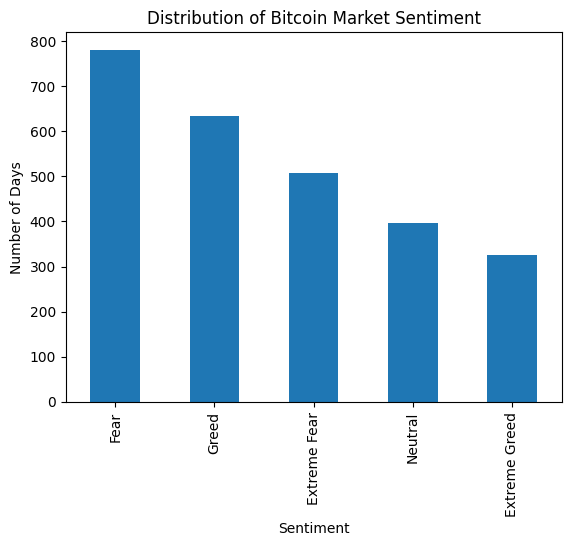

In [17]:
sentiment_df["classification"].value_counts().plot(
    kind="bar",
    title="Distribution of Bitcoin Market Sentiment",
    ylabel="Number of Days",
    xlabel="Sentiment"
)
plt.show()


In [18]:
sentiment_df = sentiment_df.sort_values("date").reset_index(drop=True)


In [19]:
sentiment_df["date"].min(), sentiment_df["date"].max()


(Timestamp('2018-02-01 00:00:00'), Timestamp('2025-05-02 00:00:00'))

In [22]:
import os
import pandas as pd

# Load raw datasets (do NOT assume column names)
trader_df = pd.read_csv("../data/raw/historical_data.csv")
sentiment_df = pd.read_csv("../data/raw/fear_greed_index.csv")

# -------------------------------
# STANDARDIZE COLUMN NAMES
# -------------------------------
trader_df.columns = trader_df.columns.str.lower().str.replace(" ", "_")
sentiment_df.columns = sentiment_df.columns.str.lower().str.replace(" ", "_")

# -------------------------------
# IDENTIFY TIMESTAMP COLUMN SAFELY
# -------------------------------
possible_time_cols = ["time", "timestamp", "timestamp_ist", "executed_at", "created_at"]

time_col = None
for col in possible_time_cols:
    if col in trader_df.columns:
        time_col = col
        break

if time_col is None:
    raise ValueError("❌ No timestamp column found in trader data")

# -------------------------------
# CREATE DATE COLUMN
# -------------------------------
trader_df[time_col] = pd.to_datetime(trader_df[time_col])
trader_df["date"] = pd.to_datetime(trader_df[time_col].dt.date)

sentiment_df["date"] = pd.to_datetime(sentiment_df["date"])

# -------------------------------
# MERGE DATASETS
# -------------------------------
merged_df = pd.merge(
    trader_df,
    sentiment_df,
    on="date",
    how="inner"
)

# -------------------------------
# SAVE TO PROCESSED FOLDER
# -------------------------------
os.makedirs("../data/processed", exist_ok=True)

merged_df.to_csv(
    "../data/processed/merged_trader_sentiment.csv",
    index=False
)

print("✅ merged_trader_sentiment.csv saved successfully")
print("Timestamp column used:", time_col)
print("Final shape:", merged_df.shape)


✅ merged_trader_sentiment.csv saved successfully
Timestamp column used: timestamp
Final shape: (0, 20)
